# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of ridge and lasso regression!

## Objectives

In this lab you will: 

- Use lasso and ridge regression with scikit-learn 
- Compare and contrast lasso, ridge and non-regularized regression 

## Housing Prices Data

We'll use this version of the Ames Housing dataset: 

In [1]:
# Run this cell without changes
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('housing_prices.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

More information about the features is available in the `data_description.txt` file in this repository.

## Data Preparation

The code below:

* Separates the data into `X` (predictor) and `y` (target) variables
* Splits the data into 75-25 training-test sets, with a `random_state` of 10
* Separates each of the `X` values into continuous vs. categorical features
* Fills in missing values (using different strategies for continuous vs. categorical features)
* Scales continuous features to a range of 0 to 1
* Dummy encodes categorical features
* Combines the preprocessed continuous and categorical features back together

In [2]:
# Run this cell without changes
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create X and y
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Separate X data into continuous vs. categorical
X_train_cont = X_train.select_dtypes(include='number')
X_test_cont = X_test.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Impute missing values using SimpleImputer, median for continuous and
# filling in 'missing' for categorical
impute_cont = SimpleImputer(strategy='median')
X_train_cont = impute_cont.fit_transform(X_train_cont)
X_test_cont = impute_cont.transform(X_test_cont)
impute_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = impute_cat.fit_transform(X_train_cat)
X_test_cat = impute_cat.transform(X_test_cat)

# Scale continuous values using MinMaxScaler
scaler = MinMaxScaler()
X_train_cont = scaler.fit_transform(X_train_cont)
X_test_cont = scaler.transform(X_test_cont)

# Dummy encode categorical values using OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

# Combine everything back together
X_train_preprocessed = np.concatenate([X_train_cont, X_train_cat.todense()], axis=1)
X_test_preprocessed = np.concatenate([X_test_cont, X_test_cat.todense()], axis=1)

## Linear Regression Model

Let's use this data to build a first naive linear regression model. Fit the model on the training data (`X_train_preprocessed`), then compute the R-Squared and the MSE for both the training and test sets.

In [3]:
# Replace None with appropriate code
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression().fit(X_train_preprocessed, y_train)

# Print R2 and MSE for training and test sets
print("Train MSE :", mean_squared_error(y_train, linreg.predict(X_train_preprocessed)))
print("Train R2 :", r2_score(y_train, linreg.predict(X_train_preprocessed)))
print("Test MSE :", mean_squared_error(y_test, linreg.predict(X_test_preprocessed)))
print("Test R2 :", r2_score(y_test, linreg.predict(X_test_preprocessed)))

Train MSE : 402638134.24292237
Train R2 : 0.9358960546869315
Test MSE : 7.611310826413451e+28
Test R2 : -1.1929608147641192e+19


Notice the severe overfitting above; our training R-Squared is very high, but the test R-Squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso Regression

Use all the data (scaled features and dummy categorical variables, `X_train_preprocessed`) to build some models with regularization - two each for lasso and ridge regression. Each time, look at R-Squared and MSE.

Remember that you can use the scikit-learn documentation if you don't remember how to import or use these classes:

* [`Lasso` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [`Ridge` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_10.html)

### Lasso

#### With default hyperparameters (`alpha` = 1)

In [6]:
# Import lasso and ridge_10 
from sklearn.linear_model import Lasso, Ridge

# Set penalty term=1
lasso_1 = Lasso(alpha=1)

# Fit a lasso_1 regression model on the preprocessed train set
lasso_1.fit(X_train_preprocessed, y_train)

# Perform predictions on both train and test sets
y_h_lasso_1_train = lasso_1.predict(X_train_preprocessed)
y_h_lasso_1_test = lasso_1.predict(X_test_preprocessed)

# Print R2 and MSE for training and test sets
print("Train MSE for lasso_1 Model (alpha=1) :", mean_squared_error(y_train, y_h_lasso_1_train))
print("Train R2 for lasso_1 Model (alpha=1) :", r2_score(y_train, y_h_lasso_1_train))
print("Test MSE for lasso_1 Model (alpha=1) :", mean_squared_error(y_test, y_h_lasso_1_test))
print("Test R2 for lasso_1 Model (alpha=1) :", r2_score(y_test, y_h_lasso_1_test))

Train MSE for lasso_1 Model (alpha=1) : 403034248.99402547
Train R2 for lasso_1 Model (alpha=1) : 0.935832989328281
Test MSE for lasso_1 Model (alpha=1) : 705253190.6574919
Test R2 for lasso_1 Model (alpha=1) : 0.8894619546974661


#### With a higher regularization hyperparameter (`alpha` = 10)

In [25]:
# Set penalty term=10
lasso_10 = Lasso(alpha=10)

# Fit a lasso_10 regression model on the preprocessed train set
lasso_10.fit(X_train_preprocessed, y_train)

# Perform predictions on both train and test sets
y_h_lasso_10_train = lasso_10.predict(X_train_preprocessed)
y_h_lasso_10_test = lasso_10.predict(X_test_preprocessed)

# Print R2 and MSE for training and test sets
print("Train MSE for lasso_10 Model (alpha=10) :", mean_squared_error(y_train, y_h_lasso_10_train))
print("Train R2 for lasso_10 Model (alpha=10) :", r2_score(y_train, y_h_lasso_10_train))
print("Test MSE for lasso_10 Model (alpha=10) :", mean_squared_error(y_test, y_h_lasso_10_test))
print("Test R2 for lasso_10 Model (alpha=10) :", r2_score(y_test, y_h_lasso_10_test))

Train MSE for lasso_10 Model (alpha=10) : 414050057.74267846
Train R2 for lasso_10 Model (alpha=10) : 0.9340791643883491
Test MSE for lasso_10 Model (alpha=10) : 650267885.8547707
Test R2 for lasso_10 Model (alpha=10) : 0.8980800909835147


## ridge_10

#### With default hyperparameters (`alpha` = 1)

In [26]:
# Set penalty term=1
ridge_10_1 = ridge_10(alpha=1)

# Fit a Lasso regression model on the preprocessed train set
ridge_10_1.fit(X_train_preprocessed, y_train)

# Perform predictions on both train and test sets
y_h_ridge_10_1_train = ridge_10_1.predict(X_train_preprocessed)
y_h_ridge_10_1_test = ridge_10_1.predict(X_test_preprocessed)

# Print R2 and MSE for training and test sets
print("Train MSE for ridge_10_1 Model (alpha=1) :", mean_squared_error(y_train, y_h_ridge_10_1_train))
print("Train R2 for ridge_10_1 Model (alpha=1) :", r2_score(y_train, y_h_ridge_10_1_train))
print("Test MSE for ridge_10_1 Model (alpha=1) :", mean_squared_error(y_test, y_h_ridge_10_1_test))
print("Test R2 for ridge_10_1 Model (alpha=1) :", r2_score(y_test, y_h_ridge_10_1_test))

Train MSE for ridge_1 Model (alpha=1) : 497431636.9366223
Train R2 for ridge_1 Model (alpha=1) : 0.920803998083458
Test MSE for ridge_1 Model (alpha=1) : 725046555.2898793
Test R2 for ridge_1 Model (alpha=1) : 0.8863596364585588


#### With higher regularization hyperparameter (`alpha` = 10)

In [7]:
# Set penalty term=10
ridge_10 = Ridge(alpha=10)

# Fit a Lasso regression model on the preprocessed train set
ridge_10.fit(X_train_preprocessed, y_train)

# Perform predictions on both train and test sets
y_h_ridge_10_train = ridge_10.predict(X_train_preprocessed)
y_h_ridge_10_test = ridge_10.predict(X_test_preprocessed)

# Print R2 and MSE for training and test sets
print("Train MSE for ridge_10 Model (alpha=10) :", mean_squared_error(y_train, y_h_ridge_10_train))
print("Train R2 for ridge_10 Model (alpha=10) :", r2_score(y_train, y_h_ridge_10_train))
print("Test MSE for ridge_10 Model (alpha=10) :", mean_squared_error(y_test, y_h_ridge_10_test))
print("Test R2 for ridge_10 Model (alpha=10) :", r2_score(y_test, y_h_ridge_10_test))

Train MSE for ridge_10 Model (alpha=10) : 697499474.5470241
Train R2 for ridge_10 Model (alpha=10) : 0.8889512334535103
Test MSE for ridge_10 Model (alpha=10) : 768855818.6047639
Test R2 for ridge_10 Model (alpha=10) : 0.8794931799899864


## Comparing the Metrics    

Which model seems best, based on the metrics?

In [51]:
# Write your conclusions here:
print("""The Lasso regression model at alpha=10 has the best combined results of MSE and R-squared values.
It's test MSE of about 650267885 is the lowest of all models, having risen from about 414050057 in the train set.
It's test R-squared value of about 0.898 is the highest of all models, having slightly dropped from about 0.934 
in the train set.
I therefore, choose it as the best regression model for the data.
 """)


The Lasso regression model at alpha=10 has the best combined results of MSE and R-squared values.
It's test MSE of about 650267885 is the lowest of all models, having risen from about 414050057 in the train set.
It's test R-squared value of about 0.898 is the highest of all models, having slightly dropped from about 0.934 
in the train set.
I therefore, choose it as the best regression model for the data.
 


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

In terms of both R-Squared and MSE, the `Lasso` model with `alpha`=10 has the best metric results.

(Remember that better R-Squared is higher, whereas better MSE is lower.)

</details>

## Comparing the Parameters

Compare the number of parameter estimates that are (very close to) 0 for the `Ridge` and `Lasso` models with `alpha`=10.

Use 10**(-10) as an estimate that is very close to 0. 

In [ ]:
# Number of ridge_10 params almost zero
print('Zeroed-out ridge params:', sum(abs(ridge_10.coef_) < 10**(-10)),
     'out of', len(ridge_10.coef_))

In [ ]:
# Number of Lasso_10 params almost zero
print('Zeroed-out lasso params:', sum(abs(lasso_10.coef_) < 10**(-10)),
     'out of', len(lasso_10.coef_))

In [46]:
# Number of ridge_10 params almost zero
print("ridge_10 parameters with close to zero coefficients:", len(ridge_10.coef_[ridge_10.coef_ == (10**(-10))]))
print("ridge_10 parameters with non-ero coefficients:", len(ridge_10.coef_[ridge_10.coef_ != (10**(-10))]))

ridge_10 parameters with close to zero coefficients: 0
ridge_10 parameters with non-ero coefficients: 295


In [59]:
# Number of Lasso_10 params almost zero
print('lasso_10 parameter with close to zero coefficients:', len(lasso_10.coef_[lasso_10.coef_ == 0]))
print('lasso_10 parameter with close to zero coefficients:', len(lasso_10.coef_[lasso_10.coef_ != 0]))

lasso_10 parameter with close to zero coefficients: 81
lasso_10 parameter with close to zero coefficients: 214


In [6]:
# Compare and interpret these results
print("""The Lasso model has zeroed out 81 out of 295 parameter coefficients while the ridge model has 
not zeroed out any parameter coefficient. 

The shrinkage and selection of paramater effects could explain the better performance of the Lasso model.""")

The Lasso model has zeroed out 81 out of 295 parameter coefficients while the ridge model has 
not zeroed out any parameter coefficient. 

The shrinkage and selection of paramater effects could explain the better performance of the Lasso model.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The ridge_10 model did not penalize any coefficients to 0, while the lasso model removed about 1/4 of the coefficients. The lasso model essentially performed variable selection for us, and got the best metrics as a result!

</details>

## Finding an Optimal Alpha

Earlier we tested two values of `alpha` to see how it affected our MSE and the value of our coefficients. We could continue to guess values of `alpha` for our ridge or lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

Optimal Alpha Value: 28


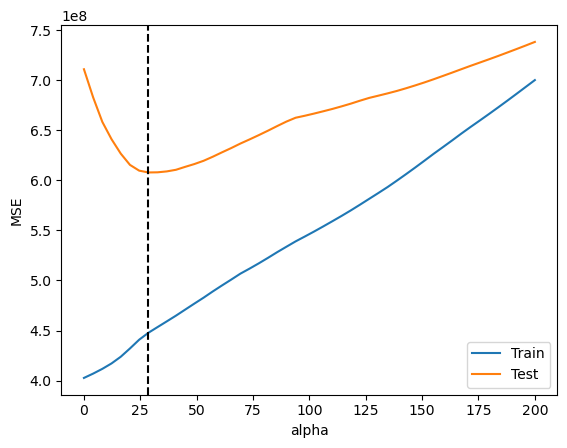

In [52]:
# Run this cell without changes
import matplotlib.pyplot as plt
%matplotlib inline

train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_preprocessed, y_train)
    
    train_preds = lasso.predict(X_train_preprocessed)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_preprocessed)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against `alpha`. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what `alpha` represents and how it relates to overfitting vs underfitting.

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

For `alpha` values below 28, the model is overfitting. As `alpha` increases up to 28, the MSE for the training data increases and MSE for the test data decreases, indicating that we are reducing overfitting.

For `alpha` values above 28, the model is starting to underfit. You can tell because _both_ the train and the test MSE values are increasing.

</details>

## Summary

Well done! You now know how to build lasso and ridge regression models, use them for feature selection and find an optimal value for `alpha`. 